# ⭐Imports


**Most Relevant Papers** <br />
https://arxiv.org/pdf/1407.5675.pdf <br />
https://arxiv.org/pdf/1701.08784.pdf

In [1]:
from processing_functions import *

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from IPython.display import display

%matplotlib inline

---

# ⭐(Ignore) Step 0: Read the data (tar.gz file) & Explore it
**Read**

As a first step, we unzipped the tar.gz file into a .dat file using 7-zip. 
Then, we convert the .dat file into a string and then into a DataFrame.

.strip() --> remove spaces on the sides

.split() --> separate values by spaces (otherwise we'd get a single conlumn)

In [2]:
# Convert .dat file into string (list comprehension)
datContent = [i.strip().split() for i in open("tth_semihad.dat").readlines()]

# Convert list into DataFrame
mydata = pd.DataFrame(datContent)

**Explore**

**Physics**

Jonas: "The file was produced from a simulation of pp->tt~H where the top decays hadronically
and the anti-top decays leptonically. <br /> I selected events with exactly 1 fat jet with R=1.5."


**Notes**
- The rows represent events (of 1 fat jet each, R = 1.5) 
- The first column represents the number of constituents of the jet  
- The following columns represent the coordinates of the constituents, η, φ, pT, cycling in that order. <br />(e.g. columns 1, 2, 3 are η, φ, pT for the 1st constituent, columns 4, 5, 6 are η, φ, pT for the 2nd constituent etc.)


- -infinity < η < infinity 
- -π < φ < π
- pT[GeV] > 0


In [3]:
# # Display the data
# mydata = mydata.rename(columns={0: 'Const'})
# display(mydata.head())

# # Print statements
# events = mydata.shape[0]
# print('There are {} rows (events).'.format(events))
# print('The maximum number of constituents in an event is {}.'.format((mydata.shape[1] - 1) // 3))

## Display data types
#print('\nData Types: \n', mydata.dtypes)

## Descriptive statistics on data
#mydata.describe()

---

# ⭐Step 1: Preprocessing

🔴 Define helper function that
- drops the constituents column 
- converts NaN to 0
- converts values to floats

In [4]:
# preprocess(event)

# ⭐Step 2: Create Image & Average Image

### 🔵 Create Image

🔴 Define Helper Function that takes an event as input and returns an image
- Bins coordinates (η, φ, pT)
- Creates image using np.histogram2d()

In [5]:
#create_image(event, R=1.5, pixels=60)

### 🔵 Create Average Image

🔴 Define Helper Function that reads events directly from a file and returns an average image


**NOTE:** event_no list implementation for multiple images is not working properly

In [6]:
#average_image(pixels=60, R=1.5, event_no=12178, display=False):

Example (Image Progression)

In [7]:
#average_image(pixels = 100, event_no=[25, 300, 3000, 12000], display=True)

# ⭐Step 3: Extract Maxima

🔴 Define Helper Function that 

returns 3 vectors, one for each pT and its η, φ. (For the three maximum pT's)

- **1st vector**: 1st maximum pT and its η, φ
- **2nd vector**: 2nd maximum pT and its η, φ
- **3rd vector**: 3rd maximum pT and its η, φ

In [8]:
#extract_max123(event)

**Why the if statement?** (note to self) <br />
Because if maximum pT is 0 in the pdata vector, it picks the ID of the first pT by default as the max (because they're all 0). <br />
Then, it goes to the non-zero'd event vector and adds its non-zero pT as the max, when the value of that max should clearly have been 0.

So the if statement fixes this: <br />
- If max pT != 0, then add it as normal.
- If max pT = 0, then add '0' as its value instead. (with the coordinates of the first pT, which is incorrect, but this doesn't matter since pT = 0 are not taken into account in the image) <br />


---

# ⭐Step 4: Centre Image

For each row, we centre a new coordinate system so that the highest pT constituent's coordinates are (φ', η') = (0, 0). <br />
This corresponds to rotating and boosting along the beam direction to center the jet.

**φ Tranformation**<br />
For the φ transformation, we subtract the φ (of the max pT) from all φ's in that row. <br />
If the values exceed [-π, π], we add 2π to the final result (if it's <-π) or subtract 2π from the final result (if it's >π). This makes sure that no values exceed the original φ interval. <br />
This has the effect of making the φ (corresponding to the max pT for that row) equal to 0 in each row, and shifting the other φ's by that same angle, while maintaining a range of 2π. <br />

**η Transformation**<br />
How does η transform? We need a Lorentz Transformation. 

**Paper** (E) <br />
Histograms binned in
either the angular separation of events or the rapidity separation of events can
be contributed to by events whose centre of mass frames are boosted by arbitrary velocities with respect to the rest frame of the detector, the lab frame.
The resulting histograms are undistorted by these centre of mass frame boosts
parallel to the beam axis, as the dependent variable is invariant with respect
to this sub–class of Lorentz boosts.

**Paper** (F): make code cell below markdown to display


In [9]:
#<img src="h1.png" width="500"> <img src="h2.png" width="500">

🔴 Define Helper Function <br />
Centers image around (φ', η') = (0, 0). Both transformations are linear (so far). 


In [10]:
#center(event, max123, output='event', R=1.5, pixels=60):

# ⭐Step 5: Rotate Image

Rotate all constituents around (φ’,η’)=0 such that the constituent with the 2nd highest pT is at 12 o’clock, i.e. at  (φ’,η’)=(0,e) with e > 0.

**Paper (C)** <br />
"Rotation: Rotation is performed to remove the stochastic nature of the decay
angle relative to the η − φ coordinate system. This alignment can be done very
generally, by determining the principal axis [48] of the original image and rotating the image around the jet-energy centroid such that the principal axis
is always vertical."

#### Resources
https://stackoverflow.com/questions/53854066/pythonhow-to-rotate-an-image-so-that-a-feature-becomes-vertical

https://alyssaq.github.io/2015/computing-the-axes-or-orientation-of-a-blob/

https://pythontic.com/image-processing/pillow/rotate

https://www.askpython.com/python/examples/rotate-an-image-by-an-angle-in-python

https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/




🔴 Define Helper Function that

- 
- 
- 

In [ ]:
average_image(pixels = 30, event_no=[1], display=True)

In [43]:
from scipy import ndimage

def rotate(image, max123):
    
    angle = np.arctan(max123[1]['φ'] / max123[1]['η'])
    image = ndimage.rotate(image, angle)
    
    return image


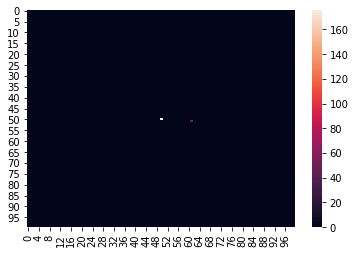

In [47]:
e = 1

# Preprocess
event = mydata.iloc[e]                         # Turn into Series
event = preprocess(event)                        # Preprocess
max123, f_id_2, flip_img = extract_max123(event)           # Extract maxima
event = center(event, max123)                    # Center 
#event = flip(event, flip_img)                     # Flip 
event = create_image(event, pixels=100, R=3)  # Create image
#event = rotate(event, max123)                   # Rotate 



sns.heatmap(event)

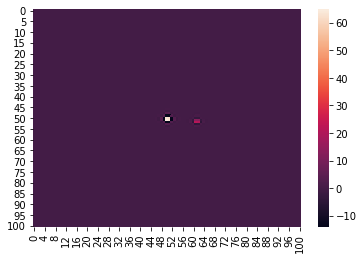

In [48]:
# Preprocess
event = mydata.iloc[e]                         # Turn into Series
event = preprocess(event)                        # Preprocess
max123, f_id_2, flip_img = extract_max123(event)           # Extract maxima
event = center(event, max123)                    # Center 
#event = flip(event, flip_img)                     # Flip 
event = create_image(event, pixels=100, R=3)  # Create image
event = rotate(event, max123)                   # Rotate 



sns.heatmap(event)

In [12]:
e = 6

# Preprocess
event = preprocess(mydata.iloc[e])
max123, f2 = extract_max123(event)                   
event = center(event, max123)                    
image = create_image(event)

# Rotate
#event = rotate(event, max123)

sns.heatmap(image)

ValueError: too many values to unpack (expected 2)

In [ ]:
e = 6

# Preprocess
event = preprocess(mydata.iloc[e])
max123, f2 = extract_max123(event)                   
event = center(event, max123) 
event = rotate(event, max123)
image = create_image(event)

# Rotate
#event = rotate(event, max123)

sns.heatmap(image)

In [ ]:
from scipy import ndimage
from sklearn.decomposition.pca import PCA


def rotate(evenτ, max123):
    
    # Define η, φ indices to be used later
    h_indices = event[::3].index
    f_indices = event[1::3].index
    
    angle = np.arctan(max123[1]['φ'] / max123[1]['η'])
    
    # For all η, φ in the event
    for h_index, f_index in zip(h_indices, f_indices): 
        num_index = event.name
        
        # φ, η transform
        event.iloc[1::3][f_index] -= max123[1]['φ']
        
        h = event.iloc[0::3][h_index]
        f = event.iloc[1::3][f_index]
        event.iloc[::3][h_index] = (((h**2) * np.sin(angle)) / f) + (f**2 * np.cos(angle) / h)
        


        
        
    return event

In [ ]:
max123[1]['η']

In [ ]:
max123[1]['φ'] / max123[1]['η']

In [ ]:
np.arctan(max123[1]['φ'] / max123[1]['η'])

In [ ]:
from scipy import ndimage

def rotate(event, f_id_2):
    
    max_f = event[max123[1].loc['φ']]
    
    while abs(event.iloc[f_id_2]) > 0.1:
        ndimage.rotate(event, 1)
        
    return event

# ⭐Step 6: Flip Image

Flip all the constituents such that the constituents with the 3rd highest pT is on the right-half plane, i.e. at (φ’,η’)=(f,e) with f > 0

🔴 Define Helper Function that

- 
- 
- 

In [ ]:
#flip(event, flip_img)